In [2]:
import torch
import torch.nn as nn
import torchvision
from torchvision import transforms, datasets
import torch.utils.data as tud
import torch.optim as optim 
import matplotlib.pyplot as plt
#import helper

#import imageio
import numpy as np

#from torchvision.utils import make_grid, save_image
from tqdm import tqdm

In [3]:
batch_size = 64
#path = r"C:\Users\asus\Documents\ML_Ahtisham_Passat_dataset\gpr_passat_dataset_HAB"
dataset_int = datasets.ImageFolder(r"C:\Users\asus\Documents\ML_Ahtisham_Passat_dataset\dataset_passat_images",
                      transform = transforms.Compose([transforms.Grayscale(num_output_channels=1),
                                                      transforms.Resize(255),
                                                      transforms.CenterCrop(224),
                                                      #transforms.Normalize((0.5,), (0.5,)),
                                                      transforms.ToTensor(),]))

dataset_int_loader = tud.DataLoader(dataset_int, batch_size=batch_size, shuffle=True)

In [4]:
for data in dataset_int_loader:
    #print(data)
    break
    
    
    
data_iter = iter(dataset_int_loader)
images, labels = data_iter.next()
print(torch.min(images), torch.max(images))

tensor(0.) tensor(1.)


In [5]:
labels.shape

torch.Size([64])

In [26]:
dataset_int_loader
dataset_int

Dataset ImageFolder
    Number of datapoints: 5349
    Root location: C:\Users\asus\Documents\ML_Ahtisham_Passat_dataset\dataset_passat_images
    StandardTransform
Transform: Compose(
               Grayscale(num_output_channels=1)
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
           )

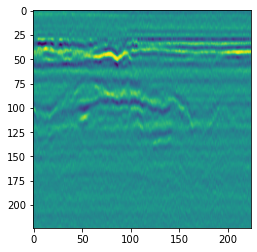

In [6]:
plt.imshow(data[0][0].view(224,224))

In [7]:
class Autoencoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(224*224, 128), #  (BS,784) --> (BS,128)
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 12), 
            nn.ReLU(),
            nn.Linear(12, 3)     #output BS x 3   
        )
        
        
        self.decoder = nn.Sequential(
            nn.Linear(3, 12), 
            nn.ReLU(),
            nn.Linear(12, 64),
            nn.ReLU(),
            nn.Linear(64, 128), 
            nn.ReLU(),
            nn.Linear(128, 224*224),     #output BS x 784   
            nn.Sigmoid()       #min: tensor(0.), max: tensor(1.)
        )
        
        
    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded


In [8]:
lr = 0.003
weight_decay = 0.00005
AE = Autoencoder()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(AE.parameters(), lr = lr) #w/o weight_decay

100%|██████████| 84/84 [00:59<00:00,  1.40it/s]


Epoch 0 of 2
loss: 0.0081


100%|██████████| 84/84 [01:02<00:00,  1.35it/s]

Epoch 1 of 2
loss: 0.0100


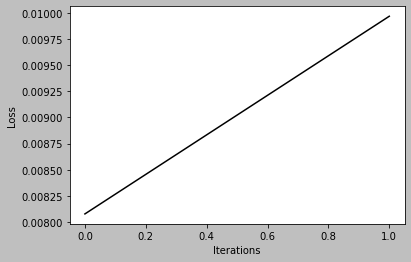

In [17]:
epochs = 2
outputs = []
img = []
ae_loss = []
for epoch in range(epochs):
    for (image,_) in tqdm(dataset_int_loader):
        image = image.view(-1, 224*224)
        reconstructed = AE(image)
        loss = criterion(reconstructed, image)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    #print(f'epoch:{epoch+1}, loss:{loss.item():.4f}')
    print(f"Epoch {epoch} of {epochs}")
    print(f"loss: {loss.item():.4f}")
    outputs.append((epoch, image, reconstructed))
    ae_loss.append(loss)     
                          
                          
                          
    #ae_img = AE(image).detach()
    #ae_img = make_grid(generated_img)
    #save_ae_image(ae_img, f"{epoch}.png")
    #img.append(ae_img)
    
    
plt.style.use('grayscale')
plt.xlabel('Iterations')
plt.ylabel('Loss')

plt.plot(ae_loss)


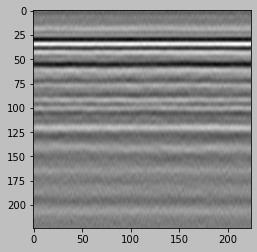

In [20]:
#plotting the image generated by the AE
for i, item in enumerate(reconstructed):
  item = item.view(-1, 224, 224).detach()
  plt.imshow(item[0])


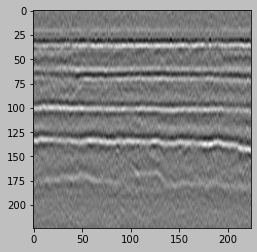

In [21]:
#plotting the image generated by the AE
for i, item in enumerate(image):
  item = item.view(-1, 224, 224).detach()
  plt.imshow(item[0])